#Week4 アヤメの二値分類

###【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。


- virgicolorとvirginica
- sepal_lengthとpetal_length

In [181]:
import numpy as np
np.set_printoptions(threshold=100)   #print表示での配列の省略：有り（閾値=100）
#np.set_printoptions(threshold=np.inf)   #print表示での配列の省略：無し

from sklearn.datasets import load_iris
iris = load_iris()
'''
print("iris.feature_names: {}".format(iris.feature_names))
print("iris.data:\n{}".format(iris.data))
print("iris.data.shape: {}".format(iris.data.shape))
print("iris.target_names: {}".format(iris.target_names))
print("iris.target:\n{}".format(iris.target))
print("iris.target.shape: {}".format(iris.target.shape))
'''
print("iris.target_names: {}".format(iris.target_names))
import pandas as pd
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print("X:\n{}".format(X))

y = pd.DataFrame(data=iris.target, columns=["species"])
print("y:\n{}".format(y))

pd.set_option('display.max_rows', 150)    #最大表示行数を150にセット
pd.set_option('display.max_columns', 5)   #最大表示列数を5にセット

df = pd.concat([X, y], axis=1)
display(df)

iris.target_names: ['setosa' 'versicolor' 'virginica']
X:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11    

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [182]:
#目的変数（正解ラベル）をvirgicolorとvirginicaのみに削減する。（Setosaのデータ行を削除する）
# df2 = df.copy()
# del_index_list = []

# for n in df.index:
#     print(n)
#     del_index_list.append(n)

df2 = df[df.loc[:, "species"]==1]
df3 = df[df.loc[:, "species"]==2]

df4 = pd.concat([df2, df3], axis=0)
df4 = df4.drop("sepal width (cm)", axis=1)
df4 = df4.drop("petal width (cm)", axis=1)

display(df4)

,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
55,5.7,4.5,1
56,6.3,4.7,1
57,4.9,3.3,1
58,6.6,4.6,1
59,5.2,3.9,1


###【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。


ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

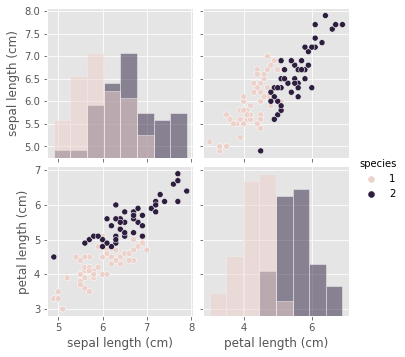

In [183]:
#散布図行列を作成
import seaborn as sns
sns.pairplot(df4, hue="species", diag_kind="hist")

{'boxes': [<matplotlib.lines.Line2D at 0x7fbf14136810>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbf1413f810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbf141477d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbf141472d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbf14136d50>,
  <matplotlib.lines.Line2D at 0x7fbf140cf6d0>]}

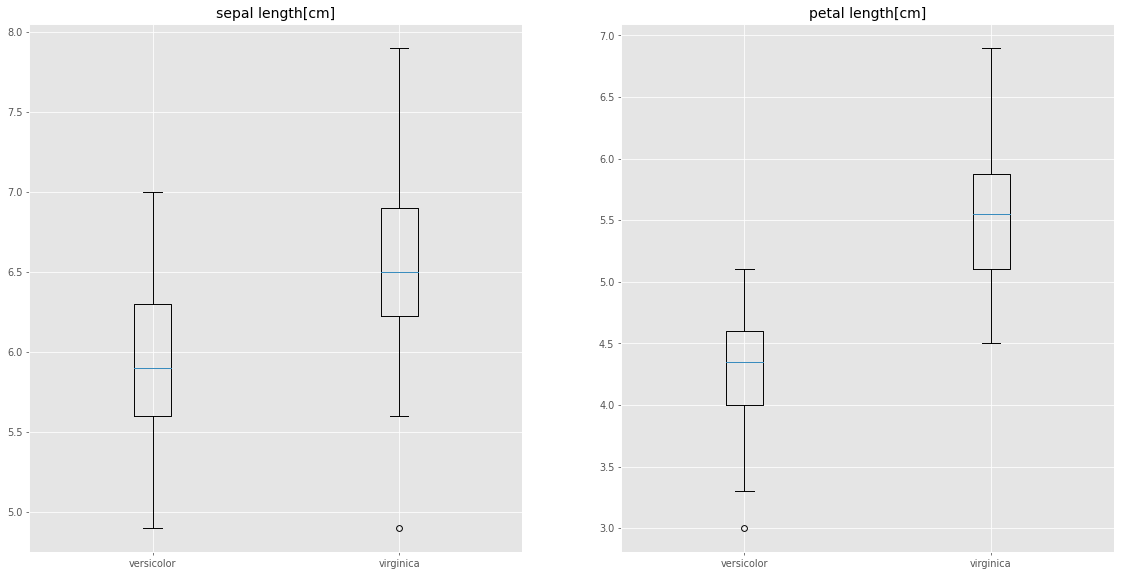

In [184]:
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')


#各説明変数の箱ひげ図をラベル毎に描画
fig1, ax1 = plt.subplots(1, 2 , figsize=(20, 10), dpi=70)
ax1[0].set_title("sepal length[cm]")
ax1[1].set_title("petal length[cm]")
sepal_length_list = [df4[df4.loc[:, "species"]== 1].loc[:, "sepal length (cm)"], df4[df4.loc[:, "species"]== 2].loc[:, "sepal length (cm)"]]
petal_length_list = [df4[df4.loc[:, "species"]== 1].loc[:, "petal length (cm)"], df4[df4.loc[:, "species"]== 2].loc[:, "petal length (cm)"]]
ax1[0].boxplot(sepal_length_list, labels=iris.target_names[1:3])
ax1[1].boxplot(petal_length_list, labels=iris.target_names[1:3])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fbf140abd50>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fbf14028e10>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fbf1401bb90>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fbf14033190>}

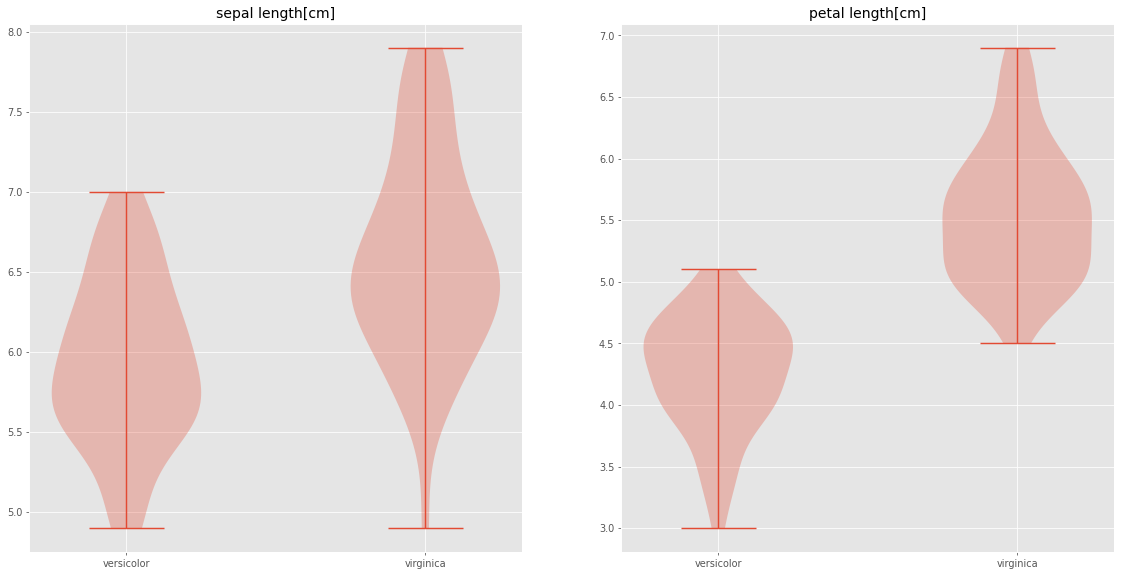

In [185]:
#各説明変数のバイオリン図をラベル毎に描画
fig3, ax3 = plt.subplots(1, 2, figsize=(20, 10), dpi=70)
ax3[0].set_title("sepal length[cm]")
ax3[1].set_title("petal length[cm]")
sepal_length_list = [df[df.loc[:, "species"]== 1].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 2].loc[:, "sepal length (cm)"]]
petal_length_list = [df[df.loc[:, "species"]== 1].loc[:, "petal length (cm)"], df[df.loc[:, "species"]== 2].loc[:, "petal length (cm)"]]
ax3[0].set_xticks([1, 2])
ax3[1].set_xticks([1, 2])
ax3[0].set_xticklabels(iris.target_names[1:3])
ax3[1].set_xticklabels(iris.target_names[1:3])
ax3[0].violinplot(sepal_length_list)
ax3[1].violinplot(petal_length_list)

###【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。


scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。


sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


《注意点》


データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。


《分割する理由》


分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [186]:
import numpy as np
from sklearn.model_selection import train_test_split

np.set_printoptions(threshold=500)

X_ndarray = np.array(df4.loc[:, "sepal length (cm)":"petal length (cm)"])
y_ndarray = np.array(df4.loc[:, "species"])

# print(X_ndarray)
# print(y_ndarray)

X_train, X_test, y_train, y_test = train_test_split(X_ndarray, y_ndarray, random_state=0, test_size=0.25)
print(X_train)
print("\n")
print(X_test)
print("\n")
print(y_train)
print("\n")
print(y_test)

[[5.1 3. ]
 [6.3 4.7]
 [5.9 5.1]
 [6.4 5.6]
 [6.2 4.8]
 [6.5 5.1]
 [7.4 6.1]
 [6.7 5.6]
 [7.7 6.9]
 [5.8 5.1]
 [6.7 5. ]
 [6.2 4.5]
 [4.9 4.5]
 [5.7 5. ]
 [6.7 5.7]
 [6.4 4.5]
 [6.4 5.3]
 [5.8 4. ]
 [6.1 4.6]
 [6.5 4.6]
 [6.7 4.4]
 [5.8 4.1]
 [5.5 4.4]
 [5.6 4.1]
 [5.7 4.5]
 [6.9 5.1]
 [7.2 6.1]
 [7.  4.7]
 [5.4 4.5]
 [6.  4.5]
 [6.3 6. ]
 [5.9 4.2]
 [6.  4.5]
 [6.1 4.7]
 [7.1 5.9]
 [5.  3.5]
 [5.5 3.7]
 [6.5 5.5]
 [7.3 6.3]
 [7.2 5.8]
 [7.7 6.1]
 [5.8 3.9]
 [6.1 5.6]
 [5.6 3.6]
 [6.9 5.4]
 [5.6 3.9]
 [5.7 3.5]
 [5.7 4.1]
 [6.5 5.2]
 [6.2 5.4]
 [6.  5. ]
 [5.9 4.8]
 [6.7 5.7]
 [7.7 6.7]
 [6.1 4.9]
 [6.6 4.4]
 [6.3 4.4]
 [7.9 6.4]
 [5.7 4.2]
 [5.5 4. ]
 [6.4 5.3]
 [6.7 5.8]
 [6.  4. ]
 [6.  4.8]
 [6.9 5.7]
 [6.4 5.5]
 [6.7 4.7]
 [6.1 4. ]
 [6.3 5.1]
 [5.2 3.9]
 [6.3 5. ]
 [7.7 6.7]
 [5.8 5.1]
 [6.2 4.3]
 [5.6 4.2]]


[[6.8 4.8]
 [6.3 5.6]
 [6.9 4.9]
 [7.6 6.6]
 [7.2 6. ]
 [6.8 5.9]
 [5.6 4.5]
 [6.3 4.9]
 [6.5 5.8]
 [6.7 5.2]
 [6.3 5.6]
 [5.8 5.1]
 [6.4 5.6]
 [6.1 4.7]
 [4.9 3.3]
 [5.5 3

###【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。


標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

In [187]:
from sklearn.preprocessing import StandardScaler

#標準化
scaler = StandardScaler()
scaler.fit(X_train)
print("scaler.mean_:")
print(scaler.mean_)
print("scaler.var_:")
print(scaler.var_)

X_train_transformed = scaler.transform(X_train) #標準化されたX_train
X_test_transformed = scaler.transform(X_test) #標準化されたX_test

print(scaler.mean_)
print(scaler.var_)

print("X_train_transformed:")
print(X_train_transformed)
print("X_train_transformed.mean():")
print(X_train_transformed.mean(axis=0))
print("X_train_transformed.std():")
print(X_train_transformed.std(axis=0))
print("\n")
print("X_test_transformed:")
print(X_test_transformed)

scaler.mean_:
[6.27466667 4.9       ]
scaler.var_:
[0.44029156 0.68373333]
[6.27466667 4.9       ]
[0.44029156 0.68373333]
X_train_transformed:
[[-1.77029021e+00 -2.29778941e+00]
 [ 3.81787899e-02 -2.41872570e-01]
 [-5.64644209e-01  2.41872570e-01]
 [ 1.88884540e-01  8.46553995e-01]
 [-1.12526960e-01 -1.20936285e-01]
 [ 3.39590289e-01  2.41872570e-01]
 [ 1.69594204e+00  1.45123542e+00]
 [ 6.41001789e-01  8.46553995e-01]
 [ 2.14805929e+00  2.41872570e+00]
 [-7.15349959e-01  2.41872570e-01]
 [ 6.41001789e-01  1.20936285e-01]
 [-1.12526960e-01 -4.83745140e-01]
 [-2.07170171e+00 -4.83745140e-01]
 [-8.66055709e-01  1.20936285e-01]
 [ 6.41001789e-01  9.67490280e-01]
 [ 1.88884540e-01 -4.83745140e-01]
 [ 1.88884540e-01  4.83745140e-01]
 [-7.15349959e-01 -1.08842656e+00]
 [-2.63232710e-01 -3.62808855e-01]
 [ 3.39590289e-01 -3.62808855e-01]
 [ 6.41001789e-01 -6.04681425e-01]
 [-7.15349959e-01 -9.67490280e-01]
 [-1.16746721e+00 -6.04681425e-01]
 [-1.01676146e+00 -9.67490280e-01]
 [-8.66055709e-0

###【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。


sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation


学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。


パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [188]:
from sklearn.neighbors import KNeighborsClassifier

# #k=5
# print("#k=5")
# neigh = KNeighborsClassifier(n_neighbors=5)
# neigh.fit(X_train_transformed, y_train)
# print(neigh.predict([[-1, -1]]))
# print(neigh.predict([[1, 1]]))
# print(neigh.predict_proba([[0, 0]]))

# #k=3
# print("#k=3")
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X_train_transformed, y_train)
# print(neigh.predict([[-1, -1]]))
# print(neigh.predict([[1, 1]]))
# print(neigh.predict_proba([[0, 0]]))

# #k=1
# neigh = KNeighborsClassifier(n_neighbors=1)
# neigh.fit(X_train_transformed, y_train)
# print("#k=1")
# print(neigh.predict([[-1, -1]]))
# print(neigh.predict([[1, 1]]))
# print(neigh.predict_proba([[0, 0]]))

#k=5のk近傍法でyを予測
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_transformed, y_train)
y_predict = neigh.predict(X_test_transformed)
print("[k=5]y_predict:")
print(y_predict)

#k=3のk近傍法でyを予測
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_transformed, y_train)
y_predict = neigh.predict(X_test_transformed)
print("[k=3]y_predict:")
print(y_predict)

#k=1のk近傍法でyを予測
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_transformed, y_train)
y_predict = neigh.predict(X_test_transformed)
print("[k=1]y_predict:")
print(y_predict)

print("y_test(true):")
print(y_test)


[k=5]y_predict:
[1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 1 1 2 1 2 1]
[k=3]y_predict:
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
[k=1]y_predict:
[1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
y_test(true):
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1]


###【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。


- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

####【問題6 解答】
- 4種類の指標値の意味について簡単に調査して文章でまとめる
1. Accuracy（正解率）
```
全分類データの内、どれだけ正しく推測できたかを示す割合（(TP+TN)/全データ数）
```
2. Precision（適合率）
```
陽性と推測した数の内、実際に陽性であった数の割合（TP/(TP+FP)）
```
3. Recall（再現率）
```
実際に陽性であるデータの内、どれだけ陽性であると推測できたかを示す割合（TP/(TP+FN)）
```
4. F値
```
適合率と再現率の調和平均（2/(1/Precision + 1/Recall)）
```

In [189]:
#Accuracy（正解率）
from sklearn.metrics import accuracy_score

print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_knn = accuracy_score(y_test, y_predict)
print(accuracy_score_knn)


#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_knn = precision_score(y_test, y_predict)
print(precision_score_knn)


#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_knn = recall_score(y_test, y_predict)
print(recall_score_knn)


#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_knn = f1_score(y_test, y_predict)
print(f1_score_knn)


#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))



###Accuracy（正解率）###
0.84


###Precision（適合率）###
0.9090909090909091


###Recall（再現率）###
0.7692307692307693


###F値###
0.8333333333333333


###Confusion matrix（混同行列）###
[[10  3]
 [ 1 11]]


###【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

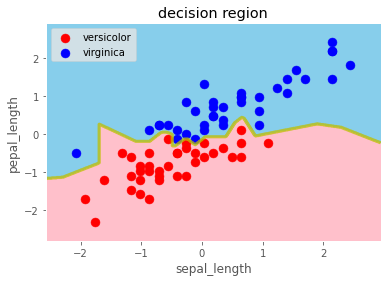

In [190]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


decision_region(X_train_transformed, y_train, model=neigh, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['versicolor', 'virginica'])

###【問題8】他の手法の学習
以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。

###ロジスティック回帰###
y_predict:
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


###Accuracy（正解率）###
0.92


###Precision（適合率）###
1.0


###Recall（再現率）###
0.8461538461538461


###F値###
0.9166666666666666


###Confusion matrix（混同行列）###
[[11  2]
 [ 0 12]]


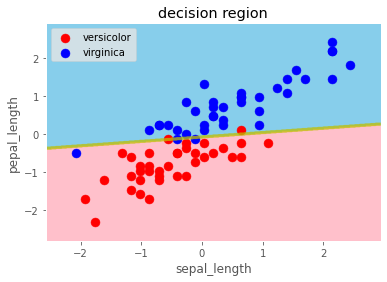

In [191]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
X = X_train_transformed
y = y_train
clf = LogisticRegression(random_state=0).fit(X, y)
print("###ロジスティック回帰###")
y_predict = clf.predict(X_test_transformed)
print("y_predict:")
print(y_predict)
#print(clf.score(X_test_transformed, y_test))

# from sklearn.metrics import precision_recall_curve
# precision, recall, threshold = precision_recall_curve(y_test, clf.predict_proba(X_test_transformed)[:, 1])


print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_logistic = accuracy_score(y_test, y_predict)
print(accuracy_score_logistic)

#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_logistic = precision_score(y_test, y_predict)
print(precision_score_logistic)

#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_logistic = recall_score(y_test, y_predict)
print(recall_score_logistic)

#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_logistic = f1_score(y_test, y_predict)
print(f1_score_logistic)

#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['versicolor', 'virginica'])

###SVM###
y_predict:
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


###Accuracy（正解率）###
0.92


###Precision（適合率）###
1.0


###Recall（再現率）###
0.8461538461538461


###F値###
0.9166666666666666


###Confusion matrix（混同行列）###
[[11  2]
 [ 0 12]]


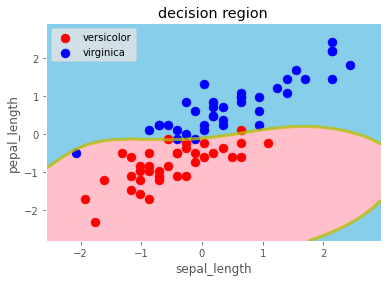

In [192]:
#SVM
from sklearn import svm
from sklearn.datasets import load_iris

X = X_train_transformed
y = y_train

print("###SVM###")
clf = svm.SVC(random_state=0, gamma="scale")
clf.fit(X, y)

y_predict = clf.predict(X_test_transformed)
print("y_predict:")
print(y_predict)

print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_SVM = accuracy_score(y_test, y_predict)
print(accuracy_score_SVM)


#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_SVM = precision_score(y_test, y_predict)
print(precision_score_SVM)

#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_SVM = recall_score(y_test, y_predict)
print(recall_score_SVM)

#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_SVM = f1_score(y_test, y_predict)
print(f1_score_SVM)

#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['versicolor', 'virginica'])

###決定木###
y_predict:
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 2 1 2 1]


###Accuracy（正解率）###
0.88


###Precision（適合率）###
1.0


###Recall（再現率）###
0.7692307692307693


###F値###
0.8695652173913044


###Confusion matrix（混同行列）###
[[10  3]
 [ 0 12]]


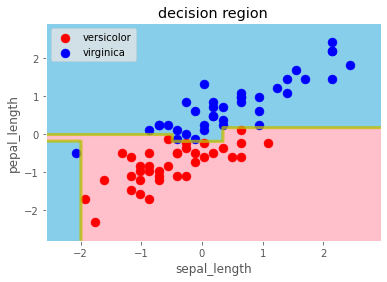

In [193]:
#決定木
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#下記は決定木可視化のためのツール
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

X = X_train_transformed
y = y_train

print("###決定木###")
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, y)

y_predict = clf.predict(X_test_transformed)
print("y_predict:")
print(y_predict)

print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_decision_tree = accuracy_score(y_test, y_predict)
print(accuracy_score_decision_tree)


#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_decision_tree = precision_score(y_test, y_predict)
print(precision_score_decision_tree)

#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_decision_tree = recall_score(y_test, y_predict)
print(recall_score_decision_tree)

#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_decision_tree = f1_score(y_test, y_predict)
print(f1_score_decision_tree)

#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

#決定木の作成
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf, out_file=dot_data,  
                     feature_names=[iris.feature_names[0], iris.feature_names[2]],
                     class_names=[iris.target_names[1], iris.target_names[2]],
                     filled=True, rounded=True,
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['versicolor', 'virginica'])

###ランダムフォレスト###
y_predict:
[1 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


###Accuracy（正解率）###
0.88


###Precision（適合率）###
1.0


###Recall（再現率）###
0.7692307692307693


###F値###
0.8695652173913044


###Confusion matrix（混同行列）###
[[10  3]
 [ 0 12]]


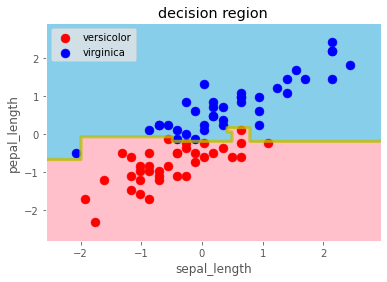

In [194]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト

X = X_train_transformed
y = y_train

print("###ランダムフォレスト###")
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

y_predict = clf.predict(X_test_transformed)
print("y_predict:")
print(y_predict)

print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_random_forest = accuracy_score(y_test, y_predict)
print(accuracy_score_random_forest)

#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_random_forest = precision_score(y_test, y_predict)
print(precision_score_random_forest)


#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_random_forest = recall_score(y_test, y_predict)
print(recall_score_random_forest)

#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_random_forest = f1_score(y_test, y_predict)
print(f1_score_random_forest)

#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['versicolor', 'virginica'])

In [195]:
#各分類器の指標値を表に記入
 
score_ndarray = np.array([accuracy_score_knn, precision_score_knn, recall_score_knn, f1_score_knn,
                          accuracy_score_logistic, precision_score_logistic, recall_score_logistic, f1_score_logistic,
                          accuracy_score_SVM, precision_score_SVM, recall_score_SVM, f1_score_SVM,
                          accuracy_score_decision_tree, precision_score_decision_tree, recall_score_decision_tree, f1_score_decision_tree,
                          accuracy_score_random_forest, precision_score_random_forest, recall_score_random_forest, f1_score_random_forest]).reshape(5, 4)
df_score = pd.DataFrame(score_ndarray, index=["KNN", "LogisticRegression", "SVM", "DecisionTree", "RandomForest"], columns=["Accuacy", "Precision", "Recall", "F1"])

display(df_score)

,Accuacy,Precision,Recall,F1
KNN,0.84,0.909091,0.769231,0.833333
LogisticRegression,0.92,1.000000,0.846154,0.916667
SVM,0.92,1.000000,0.846154,0.916667
DecisionTree,0.88,1.000000,0.769231,0.869565
RandomForest,0.88,1.000000,0.769231,0.869565


####【問題8 解答】
      上記表からは５つの学習手法のうち、ロジスティック回帰とSVMにおいて高い予測精度が得られた。
      また、学習に使用するデータセットを変更したり各学習時の乱数シード値を変化したりする度に各指標値が変動し、上記２つの手法よりも
      他の学習手法のほうが精度が良くなる場合も見られたが、ロジスティック回帰とSVMは安定して高い予測精度が得られた。
      各手法における決定領域の形状を比較すると、最近傍法・決定木・ランダムフォレストの３種は若干過学習気味の境界線となっているのに対し、
      ロジスティック回帰とSVMは汎化性の高そうな境界となっており、そのためにこれら２つの手法の予測精度が比較的高くなったものと考えられる。

###【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

In [ ]:
#１つ目の特徴量（sepal_length）のみを100倍のスケールに変更するコード（予測精度にどのような影響を及ぼすか確認）
# X_train[:, 0] = X_train[:, 0]*100
# X_train

###k近傍法###
[k=5]y_predict:
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
[k=3]y_predict:
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
[k=1]y_predict:
[1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
y_test(true):
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1]


###Accuracy（正解率）###
0.84


###Precision（適合率）###
0.9090909090909091


###Recall（再現率）###
0.7692307692307693


###F値###
0.8333333333333333


###Confusion matrix（混同行列）###
[[10  3]
 [ 1 11]]


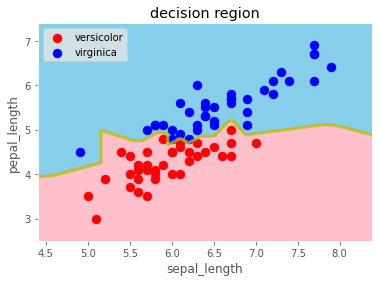

In [197]:
#k近傍法を用いて、標準化前のデータを基に学習・類推を行う
from sklearn.neighbors import KNeighborsClassifier

print("###k近傍法###")

#k=5のk近傍法でyを予測
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
print("[k=5]y_predict:")
print(y_predict)

#k=3のk近傍法でyを予測
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
print("[k=3]y_predict:")
print(y_predict)

#k=1のk近傍法でyを予測
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
print("[k=1]y_predict:")
print(y_predict)

print("y_test(true):")
print(y_test)


#Accuracy（正解率）
from sklearn.metrics import accuracy_score

print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_knn = accuracy_score(y_test, y_predict)
print(accuracy_score_knn)


#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_knn = precision_score(y_test, y_predict)
print(precision_score_knn)


#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_knn = recall_score(y_test, y_predict)
print(recall_score_knn)


#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_knn = f1_score(y_test, y_predict)
print(f1_score_knn)


#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

decision_region(X_train, y_train, model=neigh, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['versicolor', 'virginica'])

###ロジスティック回帰###
y_predict:
[1 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


###Accuracy（正解率）###
0.88


###Precision（適合率）###
1.0


###Recall（再現率）###
0.7692307692307693


###F値###
0.8695652173913044


###Confusion matrix（混同行列）###
[[10  3]
 [ 0 12]]


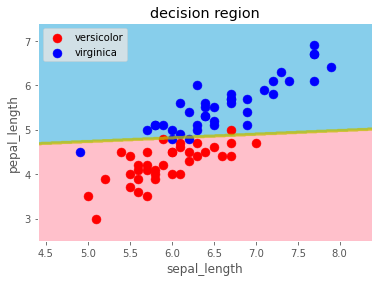

In [198]:
#ロジスティック回帰を用いて、標準化前のデータを基に学習・類推を行う
from sklearn.linear_model import LogisticRegression
X = X_train
y = y_train
clf = LogisticRegression(random_state=0).fit(X, y)
print("###ロジスティック回帰###")
y_predict = clf.predict(X_test)
print("y_predict:")
print(y_predict)


print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_logistic = accuracy_score(y_test, y_predict)
print(accuracy_score_logistic)

#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_logistic = precision_score(y_test, y_predict)
print(precision_score_logistic)

#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_logistic = recall_score(y_test, y_predict)
print(recall_score_logistic)

#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_logistic = f1_score(y_test, y_predict)
print(f1_score_logistic)

#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

decision_region(X_train, y_train, model=clf, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['versicolor', 'virginica'])

###SVM###
y_predict:
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


###Accuracy（正解率）###
0.92


###Precision（適合率）###
1.0


###Recall（再現率）###
0.8461538461538461


###F値###
0.9166666666666666


###Confusion matrix（混同行列）###
[[11  2]
 [ 0 12]]


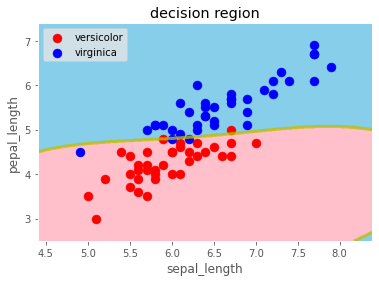

In [199]:
#SVM
from sklearn import svm
from sklearn.datasets import load_iris

X = X_train
y = y_train

print("###SVM###")
clf = svm.SVC(random_state=0, gamma="scale")
clf.fit(X, y)

y_predict = clf.predict(X_test)
print("y_predict:")
print(y_predict)


print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_SVM = accuracy_score(y_test, y_predict)
print(accuracy_score_SVM)

#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_SVM = precision_score(y_test, y_predict)
print(precision_score_SVM)

#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_SVM = recall_score(y_test, y_predict)
print(recall_score_SVM)

#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_SVM = f1_score(y_test, y_predict)
print(f1_score_SVM)

#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

decision_region(X_train, y_train, model=clf, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['versicolor', 'virginica'])

###決定木###
y_predict:
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 2 1 1 1]


###Accuracy（正解率）###
0.84


###Precision（適合率）###
0.9090909090909091


###Recall（再現率）###
0.7692307692307693


###F値###
0.8333333333333333


###Confusion matrix（混同行列）###
[[10  3]
 [ 1 11]]


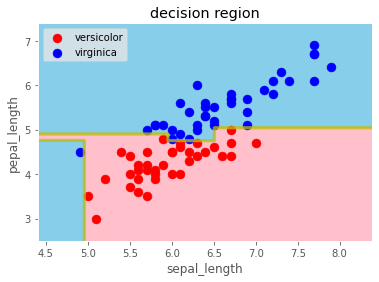

In [200]:
#決定木
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#下記は決定木可視化のためのツール
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

X = X_train
y = y_train

print("###決定木###")
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, y)

y_predict = clf.predict(X_test)
print("y_predict:")
print(y_predict)


print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_decision_tree = accuracy_score(y_test, y_predict)
print(accuracy_score_decision_tree)


#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_decision_tree = precision_score(y_test, y_predict)
print(precision_score_decision_tree)

#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_decision_tree = recall_score(y_test, y_predict)
print(recall_score_decision_tree)

#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_decision_tree = f1_score(y_test, y_predict)
print(f1_score_decision_tree)

#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

#決定木の作成
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf, out_file=dot_data,  
                     feature_names=[iris.feature_names[0], iris.feature_names[2]],
                     class_names=[iris.target_names[1], iris.target_names[2]],
                     filled=True, rounded=True,
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

decision_region(X_train, y_train, model=clf, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['versicolor', 'virginica'])

###ランダムフォレスト###
y_predict:
[2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


###Accuracy（正解率）###
0.84


###Precision（適合率）###
1.0


###Recall（再現率）###
0.6923076923076923


###F値###
0.8181818181818181


###Confusion matrix（混同行列）###
[[ 9  4]
 [ 0 12]]


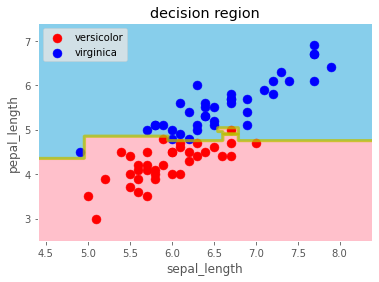

In [201]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト

X = X_train
y = y_train

print("###ランダムフォレスト###")
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

y_predict = clf.predict(X_test)
print("y_predict:")
print(y_predict)


print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_random_forest = accuracy_score(y_test, y_predict)
print(accuracy_score_random_forest)

#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_random_forest = precision_score(y_test, y_predict)
print(precision_score_random_forest)

#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_random_forest = recall_score(y_test, y_predict)
print(recall_score_random_forest)

#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_random_forest = f1_score(y_test, y_predict)
print(f1_score_random_forest)

#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

decision_region(X_train, y_train, model=clf, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['versicolor', 'virginica'])

In [202]:
#各分類器の指標値を表に記入
 
score_ndarray = np.array([accuracy_score_knn, precision_score_knn, recall_score_knn, f1_score_knn,
                          accuracy_score_logistic, precision_score_logistic, recall_score_logistic, f1_score_logistic,
                          accuracy_score_SVM, precision_score_SVM, recall_score_SVM, f1_score_SVM,
                          accuracy_score_decision_tree, precision_score_decision_tree, recall_score_decision_tree, f1_score_decision_tree,
                          accuracy_score_random_forest, precision_score_random_forest, recall_score_random_forest, f1_score_random_forest]).reshape(5, 4)
df_score = pd.DataFrame(score_ndarray, index=["KNN", "LogisticRegression", "SVM", "DecisionTree", "RandomForest"], columns=["Accuacy", "Precision", "Recall", "F1"])

display(df_score)

,Accuacy,Precision,Recall,F1
KNN,0.84,0.909091,0.769231,0.833333
LogisticRegression,0.88,1.000000,0.769231,0.869565
SVM,0.92,1.000000,0.846154,0.916667
DecisionTree,0.84,0.909091,0.769231,0.833333
RandomForest,0.84,1.000000,0.692308,0.818182


####【問題9 解答】
      上記の各指標値を確認したところ、標準化せずに学習・分類を行った場合も標準した場合と類似した傾向となり、ロジスティック回帰とSVMの
      予測精度が高い結果となった。
      おそらく、今回の2値分類に用いた2種類の特徴量は、元々の数値のスケールや平均が似通っており、標準化の前後で各特徴量間の関係性に
      大きな差異が生じなかっため、標準化せずとも比較的高い予測精度が得られたものと考えられる。

###【問題10】（アドバンス課題）すべての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類すべてを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。


《多値になることでの変更点》


指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。


決定領域を可視化する前述の関数は適切に書き換える必要があります。以下が出力例です。

In [203]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'springgreen']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    print(mesh)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))    #等高線の描画
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


# decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['setosa', 'versicolor', 'virginica'])

In [204]:
#３値分類のためのデータセットを作成
df5 = df.drop("sepal width (cm)", axis=1)
df5 = df5.drop("petal width (cm)", axis=1)

X_ndarray = np.array(df5.loc[:, "sepal length (cm)":"petal length (cm)"])
y_ndarray = np.array(df5.loc[:, "species"])

# print(X_ndarray)
# print(y_ndarray)

X_train, X_test, y_train, y_test = train_test_split(X_ndarray, y_ndarray, random_state=0, test_size=0.25)


#標準化
scaler = StandardScaler()
scaler.fit(X_train)
# print(scaler.mean_)
# print(scaler.var_)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

print("X_train_transformed")
print(X_train_transformed)
print("X_test_transformed")
print(X_test_transformed)
print("y_train")
print(y_train)
print("y_test")
print(y_test)

X_train_transformed
[[ 1.54399532e-02  2.25126850e-01]
 [-9.98450310e-02  1.13559562e-01]
 [ 1.05300481e+00  9.50314227e-01]
 [-1.36797986e+00 -1.39259884e+00]
 [ 1.16828980e+00  7.27179649e-01]
 [-1.02212490e+00 -1.22524790e+00]
 [-5.60984968e-01 -1.28103155e+00]
 [-1.02212490e+00 -1.65358660e-01]
 [ 7.07149859e-01  9.50314227e-01]
 [ 9.37719827e-01  1.06188152e+00]
 [ 1.30724937e-01  6.71396005e-01]
 [ 9.37719827e-01  1.11766516e+00]
 [-3.30414999e-01  5.77759173e-02]
 [ 2.09056967e+00  1.28501609e+00]
 [ 4.76579890e-01  5.04045072e-01]
 [-4.45699984e-01  1.99227301e-03]
 [ 4.76579890e-01  6.15612361e-01]
 [ 4.76579890e-01  7.27179649e-01]
 [-1.13740989e+00  3.92477783e-01]
 [ 4.76579890e-01  6.71396005e-01]
 [ 1.28357478e+00  5.04045072e-01]
 [ 7.07149859e-01  7.82963294e-01]
 [ 1.30724937e-01  3.92477783e-01]
 [-1.25269487e+00 -1.22524790e+00]
 [-9.98450310e-02  7.27179649e-01]
 [-3.30414999e-01  2.25126850e-01]
 [-3.30414999e-01 -1.09575016e-01]
 [-4.45699984e-01  1.13559562e-01]


###k近傍法###
[k=5]y_predict:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[k=3]y_predict:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[k=1]y_predict:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2]
y_test(true):
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


###Accuracy（正解率）###
0.9473684210526315


###Precision（適合率）###
0.9473684210526315


###Recall（再現率）###
0.9473684210526315


###F値###
0.9473684210526315


###Confusion matrix（混同行列）###
[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]
[[-2.32911979 -2.00416612]
 [-2.31911979 -2.00416612]
 [-2.30911979 -2.00416612]
 ...
 [ 2.80088021  2.22583388]
 [ 2.81088021  2.22583388]
 [ 2.82088021  2.22583388]]


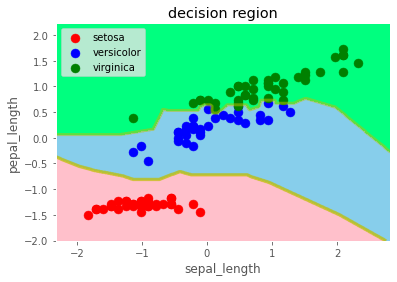

In [205]:
#k近傍法
from sklearn.neighbors import KNeighborsClassifier

print("###k近傍法###")

#k=5のk近傍法でyを予測
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_transformed, y_train)
y_predict = neigh.predict(X_test_transformed)
print("[k=5]y_predict:")
print(y_predict)

#k=3のk近傍法でyを予測
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_transformed, y_train)
y_predict = neigh.predict(X_test_transformed)
print("[k=3]y_predict:")
print(y_predict)

#k=1のk近傍法でyを予測
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_transformed, y_train)
y_predict = neigh.predict(X_test_transformed)
print("[k=1]y_predict:")
print(y_predict)

print("y_test(true):")
print(y_test)


#Accuracy（正解率）
from sklearn.metrics import accuracy_score

print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_knn = accuracy_score(y_test, y_predict)
print(accuracy_score_knn)


#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_knn = precision_score(y_test, y_predict, average='micro')
print(precision_score_knn)


#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_knn = recall_score(y_test, y_predict, average='micro')
print(recall_score_knn)


#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_knn = f1_score(y_test, y_predict, average='micro')
print(f1_score_knn)


#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

decision_region(X_train_transformed, y_train, model=neigh, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['setosa', 'versicolor', 'virginica'])

###ロジスティック回帰###
y_predict:
[2 1 0 2 0 2 0 1 2 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


###Accuracy（正解率）###
0.9473684210526315


###Precision（適合率）###
0.9473684210526315


###Recall（再現率）###
0.9473684210526315


###F値###
0.9473684210526315


###Confusion matrix（混同行列）###
[[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]
[[-2.32911979 -2.00416612]
 [-2.31911979 -2.00416612]
 [-2.30911979 -2.00416612]
 ...
 [ 2.80088021  2.22583388]
 [ 2.81088021  2.22583388]
 [ 2.82088021  2.22583388]]


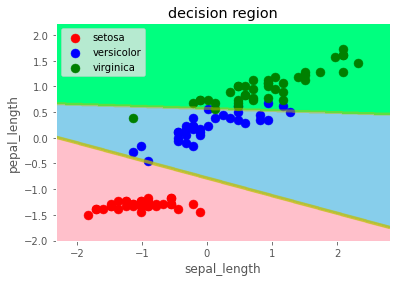

In [206]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
X = X_train_transformed
y = y_train
clf = LogisticRegression(random_state=0).fit(X, y)
print("###ロジスティック回帰###")
y_predict = clf.predict(X_test_transformed)
print("y_predict:")
print(y_predict)
#print(clf.score(X_test_transformed, y_test))

# from sklearn.metrics import precision_recall_curve
# precision, recall, threshold = precision_recall_curve(y_test, clf.predict_proba(X_test_transformed)[:, 1])


print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_logistic = accuracy_score(y_test, y_predict)
print(accuracy_score_logistic)

#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_logistic = precision_score(y_test, y_predict, average='micro')
print(precision_score_logistic)

#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_logistic = recall_score(y_test, y_predict, average='micro')
print(recall_score_logistic)

#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_logistic = f1_score(y_test, y_predict, average='micro')
print(f1_score_logistic)

#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['setosa', 'versicolor', 'virginica'])

###SVM###
y_predict:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2]


###Accuracy（正解率）###
0.9473684210526315


###Precision（適合率）###
0.9473684210526315


###Recall（再現率）###
0.9473684210526315


###F値###
0.9473684210526315


###Confusion matrix（混同行列）###
[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]
[[-2.32911979 -2.00416612]
 [-2.31911979 -2.00416612]
 [-2.30911979 -2.00416612]
 ...
 [ 2.80088021  2.22583388]
 [ 2.81088021  2.22583388]
 [ 2.82088021  2.22583388]]


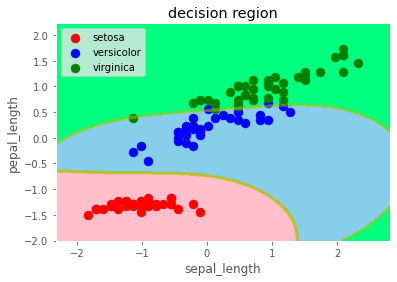

In [207]:
#SVM
from sklearn import svm
from sklearn.datasets import load_iris

X = X_train_transformed
y = y_train

print("###SVM###")
clf = svm.SVC(random_state=0, gamma="scale")
clf.fit(X, y)

y_predict = clf.predict(X_test_transformed)
print("y_predict:")
print(y_predict)

print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_SVM = accuracy_score(y_test, y_predict)
print(accuracy_score_SVM)


#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_SVM = precision_score(y_test, y_predict, average='micro')
print(precision_score_SVM)

#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_SVM = recall_score(y_test, y_predict, average='micro')
print(recall_score_SVM)

#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_SVM = f1_score(y_test, y_predict, average='micro')
print(f1_score_SVM)

#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['setosa', 'versicolor', 'virginica'])

###決定木###
y_predict:
[2 1 0 2 0 2 0 1 2 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 2 0 0 1 1 0 2 1 0 1 2 1 0
 2]


###Accuracy（正解率）###
0.8947368421052632


###Precision（適合率）###
0.8947368421052632


###Recall（再現率）###
0.8947368421052632


###F値###
0.8947368421052632


###Confusion matrix（混同行列）###
[[13  0  0]
 [ 0 14  2]
 [ 0  2  7]]
[[-2.32911979 -2.00416612]
 [-2.31911979 -2.00416612]
 [-2.30911979 -2.00416612]
 ...
 [ 2.80088021  2.22583388]
 [ 2.81088021  2.22583388]
 [ 2.82088021  2.22583388]]


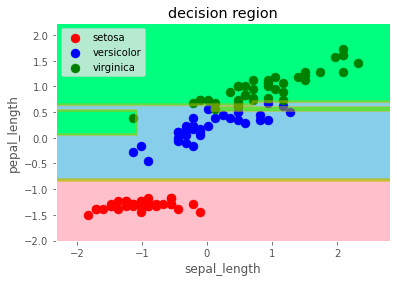

In [208]:
#決定木
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#下記は決定木可視化のためのツール
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

X = X_train_transformed
y = y_train

print("###決定木###")
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, y)

y_predict = clf.predict(X_test_transformed)
print("y_predict:")
print(y_predict)

print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_decision_tree = accuracy_score(y_test, y_predict)
print(accuracy_score_decision_tree)


#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_decision_tree = precision_score(y_test, y_predict, average='micro')
print(precision_score_decision_tree)

#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_decision_tree = recall_score(y_test, y_predict, average='micro')
print(recall_score_decision_tree)

#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_decision_tree = f1_score(y_test, y_predict, average='micro')
print(f1_score_decision_tree)

#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

#決定木の作成
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf, out_file=dot_data,  
                     feature_names=[iris.feature_names[0], iris.feature_names[2]],
                     class_names=[iris.target_names[0], iris.target_names[1], iris.target_names[2]],
                     filled=True, rounded=True,
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['setosa', 'versicolor', 'virginica'])

###ランダムフォレスト###
y_predict:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2]


###Accuracy（正解率）###
0.9210526315789473


###Precision（適合率）###
0.9210526315789473


###Recall（再現率）###
0.9210526315789473


###F値###
0.9210526315789473


###Confusion matrix（混同行列）###
[[13  0  0]
 [ 0 15  1]
 [ 0  2  7]]
[[-2.32911979 -2.00416612]
 [-2.31911979 -2.00416612]
 [-2.30911979 -2.00416612]
 ...
 [ 2.80088021  2.22583388]
 [ 2.81088021  2.22583388]
 [ 2.82088021  2.22583388]]


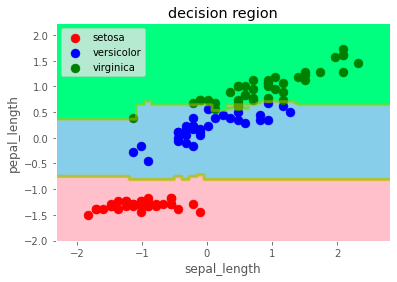

In [209]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト

X = X_train_transformed
y = y_train

print("###ランダムフォレスト###")
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

y_predict = clf.predict(X_test_transformed)
print("y_predict:")
print(y_predict)

print("\n")
print("###Accuracy（正解率）###")
# print(accuracy_score(y_test, y_predict))
# print(accuracy_score(y_test, y_predict, normalize=False))
accuracy_score_random_forest = accuracy_score(y_test, y_predict)
print(accuracy_score_random_forest)

#Precision（適合率）
from sklearn.metrics import precision_score
print("\n")
print("###Precision（適合率）###")
# print(precision_score(y_test, y_predict, average='macro'))
# print(precision_score(y_test, y_predict, average='micro'))
# print(precision_score(y_test, y_predict, average='weighted'))
# print(precision_score(y_test, y_predict, average=None))
# print(precision_score(y_test, y_predict, average=None, zero_division=1))
precision_score_random_forest = precision_score(y_test, y_predict, average='micro')
print(precision_score_random_forest)


#Recall（再現率）
from sklearn.metrics import recall_score
print("\n")
print("###Recall（再現率）###")
# print(recall_score(y_test, y_predict, average='macro'))
# print(recall_score(y_test, y_predict, average='micro'))
# print(recall_score(y_test, y_predict, average='weighted'))
# print(recall_score(y_test, y_predict, average=None))
# print(recall_score(y_test, y_predict, average=None, zero_division=1))
recall_score_random_forest = recall_score(y_test, y_predict, average='micro')
print(recall_score_random_forest)

#F値
from sklearn.metrics import f1_score
print("\n")
print("###F値###")
# print(f1_score(y_test, y_predict, average='macro'))
# print(f1_score(y_test, y_predict, average='micro'))
# print(f1_score(y_test, y_predict, average='weighted'))
# print(f1_score(y_test, y_predict, average=None))
# print(f1_score(y_test, y_predict, zero_division=1))
f1_score_random_forest = f1_score(y_test, y_predict, average='micro')
print(f1_score_random_forest)

#Confusion matrix（混同行列）
from sklearn.metrics import confusion_matrix
print("\n")
print("###Confusion matrix（混同行列）###")
print(confusion_matrix(y_test, y_predict))

decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel='sepal_length', ylabel='pepal_length', target_names=['setosa', 'versicolor', 'virginica'])

In [210]:
#各分類器の指標値を表に記入
 
score_ndarray = np.array([accuracy_score_knn, precision_score_knn, recall_score_knn, f1_score_knn,
                          accuracy_score_logistic, precision_score_logistic, recall_score_logistic, f1_score_logistic,
                          accuracy_score_SVM, precision_score_SVM, recall_score_SVM, f1_score_SVM,
                          accuracy_score_decision_tree, precision_score_decision_tree, recall_score_decision_tree, f1_score_decision_tree,
                          accuracy_score_random_forest, precision_score_random_forest, recall_score_random_forest, f1_score_random_forest]).reshape(5, 4)
df_score = pd.DataFrame(score_ndarray, index=["KNN", "LogisticRegression", "SVM", "DecisionTree", "RandomForest"], columns=["Accuacy", "Precision", "Recall", "F1"])

display(df_score)

,Accuacy,Precision,Recall,F1
KNN,0.947368,0.947368,0.947368,0.947368
LogisticRegression,0.947368,0.947368,0.947368,0.947368
SVM,0.947368,0.947368,0.947368,0.947368
DecisionTree,0.894737,0.894737,0.894737,0.894737
RandomForest,0.921053,0.921053,0.921053,0.921053


####【問題10 解答】
      ２値分類同様、３値分類でもロジスティック回帰、SVMの予測精度が最も高かった。また、最近傍法も上記2種と同等の精度となった。